In [1]:
from pybaseball import schedule_and_record
import pandas as pd
#import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#!pip install pybaseball
#!pip install xgboost

In [2]:
# import Mariners 2022 season from pybaseball using schedule_and_record and store as 'mariners_2022' variable
mariners_2022 = schedule_and_record(2022, 'SEA')

In [3]:
# review the dataframe
mariners_2022.head(16)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Friday, Apr 8",SEA,@,MIN,W,2.0,1.0,9.0,1-0,2.0,0.5,Ray,Ryan,Steckenrider,2:53,D,35462.0,.97,1,None
2,"Saturday, Apr 9",SEA,@,MIN,W,4.0,3.0,9.0,2-0,1.0,up 0.5,Munoz,Duffey,Castillo,3:09,D,20867.0,1.02,2,None
3,"Sunday, Apr 10",SEA,@,MIN,L,4.0,10.0,9.0,2-1,2.0,0.5,Ober,Gonzales,None,3:11,D,17018.0,1.05,-1,None
4,"Monday, Apr 11",SEA,@,MIN,L,0.0,4.0,9.0,2-2,2.0,1.0,Bundy,Flexen,None,3:00,N,12932.0,1.03,-2,None
5,"Tuesday, Apr 12",SEA,@,CHW,L,2.0,3.0,9.0,2-3,3.0,2.0,Lopez,Brash,Hendriks,3:22,D,36948.0,.98,-3,None
6,"Wednesday, Apr 13",SEA,@,CHW,L,4.0,6.0,9.0,2-4,4.0,2.0,Keuchel,Ray,Hendriks,2:54,N,12291.0,.98,-4,None
7,"Thursday, Apr 14",SEA,@,CHW,W,5.0,1.0,9.0,3-4,3.0,1.5,Gilbert,Lambert,None,3:01,D,13391.0,.88,1,None
8,"Friday, Apr 15",SEA,Home,HOU,W,11.0,1.0,9.0,4-4,2.0,0.5,Gonzales,Odorizzi,None,3:04,N,45023.0,1.01,2,None
9,"Saturday, Apr 16",SEA,Home,HOU,L,0.0,4.0,9.0,4-5,4.0,1.5,Verlander,Flexen,None,2:36,N,38504.0,1.05,-1,None
10,"Sunday, Apr 17",SEA,Home,HOU,W,7.0,2.0,9.0,5-5,3.0,1.0,Brash,Urquidy,None,2:56,D,26583.0,1.03,1,None


In [4]:
#mariners_2022 = mariners_2022.replace("W-wo", "W")

In [5]:
#mariners_2022 = mariners_2022.replace("L-wo", "L")

In [6]:
mariners_2022 = mariners_2022.replace("W-wo", 1)

In [7]:
mariners_2022 = mariners_2022.replace("L-wo", 0)

In [8]:
mariners_2022 = mariners_2022.replace("W", 1)

In [9]:
mariners_2022 = mariners_2022.replace("L", 0)

In [10]:
mariners_2022.head(16)

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Friday, Apr 8",SEA,@,MIN,1,2.0,1.0,9.0,1-0,2.0,0.5,Ray,Ryan,Steckenrider,2:53,D,35462.0,.97,1,None
2,"Saturday, Apr 9",SEA,@,MIN,1,4.0,3.0,9.0,2-0,1.0,up 0.5,Munoz,Duffey,Castillo,3:09,D,20867.0,1.02,2,None
3,"Sunday, Apr 10",SEA,@,MIN,0,4.0,10.0,9.0,2-1,2.0,0.5,Ober,Gonzales,None,3:11,D,17018.0,1.05,-1,None
4,"Monday, Apr 11",SEA,@,MIN,0,0.0,4.0,9.0,2-2,2.0,1.0,Bundy,Flexen,None,3:00,N,12932.0,1.03,-2,None
5,"Tuesday, Apr 12",SEA,@,CHW,0,2.0,3.0,9.0,2-3,3.0,2.0,Lopez,Brash,Hendriks,3:22,D,36948.0,.98,-3,None
6,"Wednesday, Apr 13",SEA,@,CHW,0,4.0,6.0,9.0,2-4,4.0,2.0,Keuchel,Ray,Hendriks,2:54,N,12291.0,.98,-4,None
7,"Thursday, Apr 14",SEA,@,CHW,1,5.0,1.0,9.0,3-4,3.0,1.5,Gilbert,Lambert,None,3:01,D,13391.0,.88,1,None
8,"Friday, Apr 15",SEA,Home,HOU,1,11.0,1.0,9.0,4-4,2.0,0.5,Gonzales,Odorizzi,None,3:04,N,45023.0,1.01,2,None
9,"Saturday, Apr 16",SEA,Home,HOU,0,0.0,4.0,9.0,4-5,4.0,1.5,Verlander,Flexen,None,2:36,N,38504.0,1.05,-1,None
10,"Sunday, Apr 17",SEA,Home,HOU,1,7.0,2.0,9.0,5-5,3.0,1.0,Brash,Urquidy,None,2:56,D,26583.0,1.03,1,None


In [11]:
# Separate data into labels and features

# Separate the y variable, the labels
y = mariners_2022['W/L']

#separate the X variable, the features
X_raw = mariners_2022.drop(columns=["W/L", "Date", "Tm", "Inn","W-L", "GB", "Time", "Attendance", "cLI", "Orig. Scheduled"])
### Need to do some processing of "W-L" column to convert to Win-Loss ratio ###

In [12]:
# Review the y variable
y.head()

1    1
2    1
3    0
4    0
5    0
Name: W/L, dtype: int64

In [13]:
## Review w/l column counts.
y.value_counts()

1    90
0    72
Name: W/L, dtype: int64

In [14]:
# Review the x variable
X_raw.tail(100)

,Home_Away,Opp,R,RA,Rank,Win,Loss,Save,D/N,Streak
63,Home,MIN,0.0,5.0,4.0,Jax,Gonzales,None,D,-1
64,Home,LAA,1.0,4.0,4.0,Ohtani,Kirby,Iglesias,N,-2
65,Home,LAA,8.0,1.0,4.0,Ray,Lorenzen,None,N,1
66,Home,LAA,2.0,4.0,4.0,Iglesias,Castillo,Quijada,D,-1
67,Home,LAA,0.0,3.0,4.0,Herget,Milone,Bradley,N,-2
...,...,...,...,...,...,...,...,...,...,...
158,Home,OAK,3.0,10.0,2.0,Kaprielian,Ray,None,D,-1
159,Home,DET,3.0,4.0,2.0,Garcia,Kirby,Chafin,N,-2
160,Home,DET,7.0,6.0,2.0,Torrens,Soto,None,D,1
161,Home,DET,9.0,6.0,2.0,Sheffield,Rodriguez,Castillo,D,2


In [15]:
# Review dtypes to see which dummies we neeed to get
X_raw.dtypes

Home_Away     object
Opp           object
R            float64
RA           float64
Rank         float64
Win           object
Loss          object
Save          object
D/N           object
Streak         int64
dtype: object

In [16]:
# List of categorical variables
categorical_variables = list(X_raw.dtypes[X_raw.dtypes == "object"].index)
categorical_variables

['Home_Away', 'Opp', 'Win', 'Loss', 'Save', 'D/N']

In [17]:
# text fields to usable numerical values using OneHotEncoder

# instantiate OneHotEncoder
enc = OneHotEncoder(sparse=False)

# encode catagorical variables using OneHotEncoder
encoded_data = enc.fit_transform(X_raw[categorical_variables])


In [18]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)
encoded_df.index += 1
encoded_df.head()

,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_DET,Opp_HOU,Opp_KCR,...,Save_Quijada,Save_Raley,Save_Sewald,Save_Steckenrider,Save_Swanson,Save_Tepera,Save_Thompson,Save_Trivino,D/N_D,D/N_N
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Create DataFrame with the columns containing only numerical variables from the original dataset X_raw
numerical_variables_df = X_raw.drop(columns = categorical_variables)
numerical_variables_df

,R,RA,Rank,Streak
1,2.0,1.0,2.0,1
2,4.0,3.0,1.0,2
3,4.0,10.0,2.0,-1
4,0.0,4.0,2.0,-2
5,2.0,3.0,3.0,-3
...,...,...,...,...
158,3.0,10.0,2.0,-1
159,3.0,4.0,2.0,-2
160,7.0,6.0,2.0,1
161,9.0,6.0,2.0,2


In [20]:
# use concat to combine the dataframes that contain encoded and numerical data as X
X = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

X.tail()

,R,RA,Rank,Streak,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,...,Save_Quijada,Save_Raley,Save_Sewald,Save_Steckenrider,Save_Swanson,Save_Tepera,Save_Thompson,Save_Trivino,D/N_D,D/N_N
158,3.0,10.0,2.0,-1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,3.0,4.0,2.0,-2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,7.0,6.0,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,9.0,6.0,2.0,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162,5.0,4.0,2.0,3,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# split data using test_train_split w/ random_state=1 and default test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [22]:
y_test.value_counts()

1    23
0    18
Name: W/L, dtype: int64

In [23]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [24]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression Model

In [26]:
# Create a LogisticRegression Model with the original data

# Instantiate the Logistic Regression Model w/ random_state = 1
model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train_scaled, y_train)

In [27]:
# Make predictions using testing data
y_pred = lr_model.predict(X_test_scaled)
# do we need training predictions if not doing a confusion matrix?


In [28]:
#Evaluation metrics
print(balanced_accuracy_score(y_test, y_pred))

0.9722222222222222


In [29]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[17,  1],
       [ 0, 23]], dtype=int64)

In [30]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  23
False Positive(FP) =  1
True Negative(TN) =  17
False Negative(FN) =  0


In [31]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.96      1.00      0.98        23

    accuracy                           0.98        41
   macro avg       0.98      0.97      0.98        41
weighted avg       0.98      0.98      0.98        41



### XGBoost aka Extreme Gradient Boosting

In [32]:
# Instantiate XGBoost Model w/ random_state = 1
model = XGBClassifier(random_state=1)

In [33]:
# Fit the model using the scaled training data
XGBModel = model.fit(X_train_scaled, y_train)

In [34]:
# Make predictions for test data
y_pred = XGBModel.predict(X_test_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_pred]

In [35]:
accuracy = accuracy_score(y_test, predictions)
accuracy

1.0

In [36]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[18,  0],
       [ 0, 23]], dtype=int64)

In [37]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  23
False Positive(FP) =  0
True Negative(TN) =  18
False Negative(FN) =  0


In [38]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



## Model Initialization and for loop

In [39]:
# Initialize each binary classifier
models = {}
models['Logistic Regression'] = LogisticRegression()
models['XGBoost'] = XGBClassifier()

In [40]:
# Performance Eval
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # fit the classifier
    models[key].fit(X_train_scaled, y_train)
    
    # make predictions
    predictions = models[key].predict(X_test_scaled)
    
    # calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

## Results

In [41]:
df_model = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.97561,1.0,0.958333
XGBoost,1.00000,1.0,1.000000


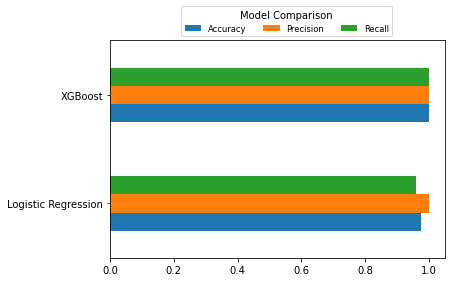

In [65]:
ax  = df_model.plot.barh()
ax.legend(
    ncol=3,
    title="Model Comparison",
    bbox_to_anchor=(.2,1),
    fontsize='small'
)